In [36]:
import numpy as np
import pandas as pd 
import math
from collections import Counter
import statistics
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

In [16]:
So = 100
r = 0.04
sig = 0.3
T = 1
m = 4
io = 2
step = T/m
c = 0.01
io_step = io*step
k = 55


In [31]:
#Simulate the stock price m times in T time
#St is a geometric brownian motion

def acrc(c):
    n = 10000
    payoff = [0]*n
    ci = c * step *So
    for sim in range(0,n):
        St = [So]*(m+1)
        loc = 1 
        exercise_date_tao = T
        Ind_tao_less_than_T = 0
        Ind_curr_less_equal_to_tao = 1
        Ind_St_less_equal_k = 1 if So<=k else 0
        Ind_tao_greater_T = 0
        flag = 0
        for i in np.arange(step,T+step,step):
            z = np.random.normal(0,1) 
            St[loc] = St[loc-1] * math.exp(((r-(sig**2)/2)*(step)) + (math.sqrt(step)*sig*z))
            
            #check indicators
            if i >io_step and St[loc]>So and i <T:
                exercise_date_tao = i
                Ind_tao_less_than_T = 1
                flag = 1 
            if St[loc] > k:
                Ind_St_less_equal_k = 0 
            else:
                Ind_St_less_equal_k = 1 
            if i == T:
                Ind_tao_greater_T = 1

            #discount factor 
            disc_fac = math.exp(-r*i)

            #payoff 
            payoff[sim] = payoff[sim] + (ci*step*disc_fac*Ind_curr_less_equal_to_tao) + (disc_fac * So * Ind_tao_less_than_T) + (disc_fac * Ind_tao_greater_T*((St[loc]*Ind_St_less_equal_k)+(So * (1-Ind_St_less_equal_k))))

            # print(i, (c*step*disc_fac*Ind_curr_less_equal_to_tao),(disc_fac * So * Ind_tao_less_than_T),(disc_fac * (Ind_tao_greater_T)*((St[loc]*Ind_St_less_equal_k)+(So * (1-Ind_St_less_equal_k)))))

            loc = loc + 1 
            if flag == 1:
                Ind_curr_less_equal_to_tao = 0
                break
    v = statistics.mean(payoff)            
    return v
            




In [38]:
c = np.arange(0,0.2,0.001)
v = [0]*200
for i in range(0,200):
    v[i]=acrc(c[i])

plt.plot(c,v)
plt.show()

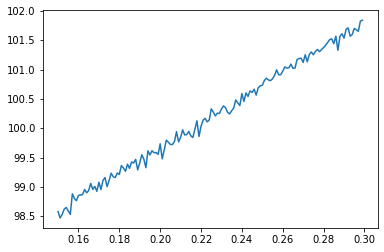

In [40]:
c = np.arange(0.150,0.3,0.001)
v = [0]*150
for i in range(0,150):
    v[i]=acrc(c[i])

plt.plot(c,v)
plt.show()

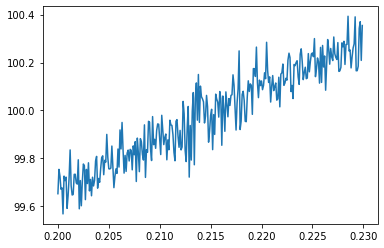

In [41]:
c = np.arange(0.20,0.23,0.0001)
v = [0]*300
for i in range(0,300):
    v[i]=acrc(c[i])

plt.plot(c,v)
plt.show()